<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Cars93-데이터로-SVM과-인공신경망-모델을-이용해-회귀분석-후-R2와-RMSE을-구하고-비교하세요" data-toc-modified-id="Cars93-데이터로-SVM과-인공신경망-모델을-이용해-회귀분석-후-R2와-RMSE을-구하고-비교하세요-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Cars93 데이터로 SVM과 인공신경망 모델을 이용해 회귀분석 후 R2와 RMSE을 구하고 비교하세요</a></span></li><li><span><a href="#titanic-데이터로-나이브베이즈-,-SVM,--인공신경망,-KNN-모델을-이용해-분류분석-후-최적의-모델을-선정하고-그-이유를-작성하세요." data-toc-modified-id="titanic-데이터로-나이브베이즈-,-SVM,--인공신경망,-KNN-모델을-이용해-분류분석-후-최적의-모델을-선정하고-그-이유를-작성하세요.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>titanic 데이터로 나이브베이즈 , SVM,  인공신경망, KNN 모델을 이용해 분류분석 후 최적의 모델을 선정하고 그 이유를 작성하세요.</a></span></li></ul></div>

## Cars93 데이터로 SVM과 인공신경망 모델을 이용해 회귀분석 후 R2와 RMSE을 구하고 비교하세요 
* 종속변수 y = Price 
* 독립변수 X = price제외 



In [9]:
import pandas as pd 
df = pd.read_csv('data/Cars93.csv')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        93 non-null     object 
 1   Model               93 non-null     object 
 2   Type                93 non-null     object 
 3   Min.Price           93 non-null     float64
 4   Price               93 non-null     float64
 5   Max.Price           93 non-null     float64
 6   MPG.city            93 non-null     int64  
 7   MPG.highway         93 non-null     int64  
 8   AirBags             93 non-null     object 
 9   DriveTrain          93 non-null     object 
 10  Cylinders           93 non-null     object 
 11  EngineSize          93 non-null     float64
 12  Horsepower          93 non-null     int64  
 13  RPM                 93 non-null     int64  
 14  Rev.per.mile        93 non-null     int64  
 15  Man.trans.avail     93 non-null     object 
 16  Fuel.tank.

In [11]:
df['Rear.seat.room'].value_counts()

26.5    9
28.0    9
27.5    8
30.5    8
26.0    8
30.0    6
25.0    5
28.5    5
27.0    5
31.0    4
31.5    3
29.5    3
23.5    3
35.0    2
24.0    2
23.0    2
24.5    2
25.5    1
19.0    1
36.0    1
29.0    1
20.0    1
33.5    1
34.0    1
Name: Rear.seat.room, dtype: int64

In [12]:
df['Rear.seat.room'] = df['Rear.seat.room'].fillna('26.5')

In [13]:
df = pd.get_dummies(df, columns = ['Manufacturer', 'Model', 'Type', 'AirBags', 'DriveTrain', 
                                      'Cylinders', 'Man.trans.avail', 'Rear.seat.room', 'Origin', 'Make'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Columns: 282 entries, Min.Price to Make_Volvo 850
dtypes: float64(5), int64(12), uint8(265)
memory usage: 36.5 KB


In [17]:
X = df.drop('Price', axis = 1)
y = df['Price']

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

svm = SVR()
mlp = MLPRegressor(random_state = 42)

svm.fit(X_train_scaled, y_train)
mlp.fit(X_train_scaled, y_train)

y_pred_svm = svm.predict(X_test_scaled)
y_pred_mlp = mlp.predict(X_test_scaled)

print("SVM")
print(svm.score(X_train_scaled, y_train))
print(svm.score(X_test_scaled, y_test))
print("\n")
print(mlp.score(X_train_scaled, y_train))
print(mlp.score(X_test_scaled, y_test))

SVM
0.2209414723636075
0.26753192350848465


0.719703298992662
0.6041731148584119


/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [22]:
# 아무런 Hypter Parameter 튜닝을 하지 않고 머신러닝 모델을 생성 후 R2값을 확인 결과,
# MLP 모델은 어느정도 학습들을 확인할 수 있었으나, SVR 모델은 모델 설명력이 매우 낮아 Hyper Parameter 튜닝이 필요하다고 판단된다

In [24]:
import numpy as np
from sklearn.metrics import mean_squared_error

mse_svm = mean_squared_error(y_test, y_pred_svm)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)

rmse_svm = np.sqrt(mse_svm)
rmse_mlp = np.sqrt(mse_mlp)

print(rmse_svm)
print(rmse_mlp)

7.34586268859211
5.40009126587714


In [25]:
# Hyper Parameter 튜닝을 하지 않은 상태에서 RMSE값 확인 결과,
# SVR 모델은 평균과 약 7만큼, MLP는 평균과 약 5만큼의 차이가 있는 것으로 확인된다.
# 2개 모델 비교시 MLP의 오차가 더 적기에 약간은 더 나은 성능을 보인다고 할 수 있다.

In [26]:
import warnings
warnings.filterwarnings('ignore')
param_svm = {'C' : [1,3,10,30,100], 'gamma' : [0.03,0.1,0.3,1,3]}
parma_mlp = {'hidden_layer_sizes' : [40,50,64,72]}

grid_svm = GridSearchCV(SVR(), param_svm, cv = 5)
grid_mlp = GridSearchCV(MLPRegressor(), parma_mlp, cv = 5)

grid_svm.fit(X_train_scaled, y_train)
grid_mlp.fit(X_train_scaled, y_train)

print(grid_svm.best_estimator_)
print(grid_mlp.best_estimator_)

SVR(C=100, gamma=0.03)
MLPRegressor(hidden_layer_sizes=72)


In [27]:
# GridSearch를 통해 확인된 Best Estimators가 각각 끝값을 가리키기에, 범위를 조정하여 재탐색 시행

In [28]:
import warnings
warnings.filterwarnings('ignore')
param_svm = {'C' : [250,300,350,400], 'gamma' : [0.001,0.005,0.1]}
parma_mlp = {'hidden_layer_sizes' : [300,320,350,400]}

grid_svm = GridSearchCV(SVR(), param_svm, cv = 5)
grid_mlp = GridSearchCV(MLPRegressor(), parma_mlp, cv = 5)

grid_svm.fit(X_train_scaled, y_train)
grid_mlp.fit(X_train_scaled, y_train)

print(grid_svm.best_estimator_)
print(grid_mlp.best_estimator_)

SVR(C=350, gamma=0.005)
MLPRegressor(hidden_layer_sizes=320)


In [29]:
y_pred_svm = grid_svm.best_estimator_.predict(X_test_scaled)
y_pred_mlp = grid_mlp.best_estimator_.predict(X_test_scaled)

In [30]:
print(grid_svm.score(X_test_scaled, y_test))
print(grid_mlp.score(X_test_scaled, y_test))

0.8607292319768396
0.8282520914450443


In [ ]:
# Hyper Parameter 튜닝을 통해 SVM의 R2값은 기존 26.7% -> 86.0%로 크게 향상되었으며,
# MLP 역시 기존 60% -> 82.8%로 상당히 많이 향상된 것을 확인할 수 있다

In [31]:
mse_grid_svm = mean_squared_error(y_test, y_pred_svm)
mse_grid_mlp = mean_squared_error(y_test, y_pred_mlp)

rmse_grid_svm = np.sqrt(mse_grid_svm)
rmse_grid_mlp = np.sqrt(mse_grid_mlp)

print("SVM RMSE : ", rmse_grid_svm)
print("MLP RMSE : ", rmse_grid_mlp)

SVM RMSE :  3.2031585852925533
MLP RMSE :  3.5570845151890613


In [32]:
# GridSearch를 통해 Best Estimator를 찾아낸 모델을 통해 예측값을 도출하고 각각의 값에 대해 RMSE값을 확인 결과
# SVM : 7.34 -> 3.2 / MLP : 5.40 -> 3.5로 RMSE값이 상당히 개선된 것을 확인할 수 있다.
# 2개 모델의 최종 RMSE값은 거의 근사하다 판단되나,
# 정확도를 평가 해야 한다면 SVM 모델을, 성능을 우선시 한다면 MLP 모델을 할용할 것이다.
# 왜냐하면 SVM 모델은 여러 개의 조합 테스트가 필요하여 학습 속도가 느리기 때문이다.
# MLP 역시 속도가 빠른 모델은 아니나, 현재 주어진 데이터를 통해 학습한 체감으로는 SVR이 더 느리다 판단된다.

## titanic 데이터로 나이브베이즈 , SVM,  인공신경망, KNN 모델을 이용해 분류분석 후 최적의 모델을 선정하고 그 이유를 작성하세요. 
* 종속변수 y = Price 
* 독립변수 X = price제외 



In [44]:
import pandas as pd 
data = pd.read_csv('data/titanic.csv')

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   adult_male   891 non-null    bool   
 10  embark_town  889 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 70.6+ KB


In [46]:
data.age = data.age.fillna(data.age.mean())
data.embarked = data.embarked.fillna(data.embarked.mode()[0])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     891 non-null    object 
 8   class        891 non-null    object 
 9   adult_male   891 non-null    bool   
 10  embark_town  889 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 70.6+ KB


In [48]:
data = data.drop(['pclass','adult_male','embark_town'], axis = 1)

In [49]:
data = pd.get_dummies(data, columns=['sex', 'embarked', 'class'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   survived      891 non-null    int64  
 1   age           891 non-null    float64
 2   sibsp         891 non-null    int64  
 3   parch         891 non-null    int64  
 4   fare          891 non-null    float64
 5   sex_female    891 non-null    uint8  
 6   sex_male      891 non-null    uint8  
 7   embarked_C    891 non-null    uint8  
 8   embarked_Q    891 non-null    uint8  
 9   embarked_S    891 non-null    uint8  
 10  class_First   891 non-null    uint8  
 11  class_Second  891 non-null    uint8  
 12  class_Third   891 non-null    uint8  
dtypes: float64(2), int64(3), uint8(8)
memory usage: 41.9 KB


In [50]:
X = data.drop('survived', axis = 1)
y = data['survived']

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, test_size=0.3, random_state=42)

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier


nb = GaussianNB()
svc = SVC(probability=True)
mlp = MLPClassifier()
knn = KNeighborsClassifier()

nb.fit(X_train, y_train)
nb.fit(X_train_scaled, y_train)

svc.fit(X_train, y_train)
svc.fit(X_train_scaled, y_train)

mlp.fit(X_train, y_train)
mlp.fit(X_train_scaled, y_train)

knn.fit(X_train, y_train)
knn.fit(X_train_scaled, y_train)

print("Naive Nays")
print("scale 전 Train Set : ", nb.score(X_train, y_train))
print("scale 전 Test Set : ", nb.score(X_train_scaled, y_train))
print("scale 후 Train Set : ", nb.score(X_test, y_test))
print("scale 후 Test Set : ", nb.score(X_test_scaled, y_test))
print("\n")
print("SVC")
print("scale 전 Train Set : ", svc.score(X_train, y_train))
print("scale 전 Test Set : ", svc.score(X_train_scaled, y_train))
print("scale 후 Train Set : ", svc.score(X_test, y_test))
print("scale 후 Test Set : ", svc.score(X_test_scaled, y_test))
print("\n")
print("MLP")
print("scale 전 Train Set : ", mlp.score(X_train, y_train))
print("scale 전 Test Set : ", mlp.score(X_train_scaled, y_train))
print("scale 후 Train Set : ", mlp.score(X_test, y_test))
print("scale 후 Test Set : ", mlp.score(X_test_scaled, y_test))
print("\n")
print("KNN")
print("scale 전 Train Set : ", knn.score(X_train, y_train))
print("scale 전 Test Set : ", knn.score(X_train_scaled, y_train))
print("scale 후 Train Set : ", knn.score(X_test, y_test))
print("scale 후 Test Set : ", knn.score(X_test_scaled, y_test))
print("\n")

Naive Nays
scale 전 Train Set :  0.38362760834670945
scale 전 Test Set :  0.7849117174959872
scale 후 Train Set :  0.3843283582089552
scale 후 Test Set :  0.7873134328358209


SVC
scale 전 Train Set :  0.38362760834670945
scale 전 Test Set :  0.8378812199036918
scale 후 Train Set :  0.3843283582089552
scale 후 Test Set :  0.8208955223880597


MLP
scale 전 Train Set :  0.47030497592295345
scale 전 Test Set :  0.8443017656500803
scale 후 Train Set :  0.44029850746268656
scale 후 Test Set :  0.8208955223880597


KNN
scale 전 Train Set :  0.6308186195826645
scale 전 Test Set :  0.8619582664526485
scale 후 Train Set :  0.6343283582089553
scale 후 Test Set :  0.8022388059701493




In [54]:
# hyper parameter 튜닝을 하지 않은 채 scaling을 한 Set과 그렇지 않은 Set에 대해 각각 R2 Score를 살펴보았다.
# 4개 모델 모두 Train Set에 비해 Test Set의 설명력이 더 낫게 나오는 이상 현상이 발생하였다. -> hyper parameter 튜닝 필요
# Naive Bays의 경우 scaing 전후 차이가 없음 / SVC, MLP, KNN의 경우 scaling 전이 더 나은 설명력을 보였다.
# 그 중 KNN의 모델 설명력이 86.2%로 가장 좋은 설명력을 보였다.

In [56]:
# Gaussian NB의 경우 사전 확률은 사망일 경우 61.6%, 생존할 경우 38.3%로 세팅 되어 있음이 확인된다.
nb.class_prior_

array([0.61637239, 0.38362761])

In [57]:
y_pred_nb = nb.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_mlp = mlp.predict(X_test)
y_pred_knn = knn.predict(X_test)

In [58]:
from sklearn.metrics import confusion_matrix, plot_roc_curve, roc_auc_score
print('Naive Bays')
print(pd.DataFrame(confusion_matrix(y_test, y_pred_nb), index = ['True[0]', 'True[1]'], columns=['Pred[0]', 'Pred[1]']))
print("\n")
print('SVC')
print(pd.DataFrame(confusion_matrix(y_test, y_pred_svc), index = ['True[0]', 'True[1]'], columns=['Pred[0]', 'Pred[1]']))
print("\n")
print('mlp')
print(pd.DataFrame(confusion_matrix(y_test, y_pred_mlp), index = ['True[0]', 'True[1]'], columns=['Pred[0]', 'Pred[1]']))
print("\n")
print('knn')
print(pd.DataFrame(confusion_matrix(y_test, y_pred_knn), index = ['True[0]', 'True[1]'], columns=['Pred[0]', 'Pred[1]']))

Naive Bays
         Pred[0]  Pred[1]
True[0]        0      165
True[1]        0      103


SVC
         Pred[0]  Pred[1]
True[0]        0      165
True[1]        0      103


mlp
         Pred[0]  Pred[1]
True[0]       18      147
True[1]        3      100


knn
         Pred[0]  Pred[1]
True[0]       85       80
True[1]       18       85


In [59]:
# confusion matrix 확인 결과 Naive Bays와 SVC는 True가 0일 경우를 거의 예측하지 못하는 것으로 보인다.

In [60]:
print("NB : ", roc_auc_score(y_test, nb.predict_proba(X_test)[:,1]))
print("SVC : ", roc_auc_score(y_test, svc.predict_proba(X_test)[:,1]))
print("mlp : ", roc_auc_score(y_test, mlp.predict_proba(X_test)[:,1]))
print("knn : ", roc_auc_score(y_test, knn.predict_proba(X_test)[:,1]))

NB :  0.5
SVC :  0.49223300970873785
mlp :  0.7010002942041776
knn :  0.6840541335686967


In [62]:
# roc_auc_score 확인 결과 4개 모델 모두 좋은 score를 보이지는 않음.
# hyper parameter 튜닝 필요

In [63]:
import warnings
warnings.filterwarnings('ignore')
#param_nb = priors=[0.5,0.5]
param_svc = {'C' : [250,300,350,400], 'gamma' : [0.001,0.005,0.1]}
param_mlp = {'hidden_layer_sizes' : [300,320,350,400]}
param_knn = {'n_neighbors' : range(5,20,1)}


grid_nb = GaussianNB(priors=[0.5,0.5])
grid_svc = GridSearchCV(SVC(probability=True), param_svm, cv = 5)
grid_mlp = GridSearchCV(MLPClassifier(), param_mlp, cv = 5)
grid_knn = GridSearchCV(KNeighborsClassifier(), param_knn, cv = 5)

grid_nb.fit(X_train, y_train)
grid_svc.fit(X_train, y_train)
grid_mlp.fit(X_train, y_train)
grid_knn.fit(X_train, y_train)

#print(grid_nb.best_estimator_)
print(grid_svc.best_estimator_)
print(grid_mlp.best_estimator_)
print(grid_knn.best_estimator_)

SVC(C=300, gamma=0.001, probability=True)
MLPClassifier(hidden_layer_sizes=300)
KNeighborsClassifier(n_neighbors=14)


In [64]:
y_pred_nb = grid_nb.predict(X_test)
y_pred_svc = grid_svc.best_estimator_.predict(X_test)
y_pred_mlp = grid_mlp.best_estimator_.predict(X_test)
y_pred_knn = grid_knn.best_estimator_.predict(X_test)

In [65]:
from sklearn.metrics import confusion_matrix, plot_roc_curve, roc_auc_score
print('Naive Bays')
print(pd.DataFrame(confusion_matrix(y_test, y_pred_nb), index = ['True[0]', 'True[1]'], columns=['Pred[0]', 'Pred[1]']))
print("\n")
print('SVC')
print(pd.DataFrame(confusion_matrix(y_test, y_pred_svc), index = ['True[0]', 'True[1]'], columns=['Pred[0]', 'Pred[1]']))
print("\n")
print('mlp')
print(pd.DataFrame(confusion_matrix(y_test, y_pred_mlp), index = ['True[0]', 'True[1]'], columns=['Pred[0]', 'Pred[1]']))
print("\n")
print('knn')
print(pd.DataFrame(confusion_matrix(y_test, y_pred_knn), index = ['True[0]', 'True[1]'], columns=['Pred[0]', 'Pred[1]']))

Naive Bays
         Pred[0]  Pred[1]
True[0]      134       31
True[1]       27       76


SVC
         Pred[0]  Pred[1]
True[0]      136       29
True[1]       26       77


mlp
         Pred[0]  Pred[1]
True[0]      138       27
True[1]       28       75


knn
         Pred[0]  Pred[1]
True[0]      138       27
True[1]       53       50


In [66]:
print("NB : ", roc_auc_score(y_test, grid_nb.predict_proba(X_test)[:,1]))
print("SVC : ", roc_auc_score(y_test, grid_svc.best_estimator_.predict_proba(X_test)[:,1]))
print("mlp : ", roc_auc_score(y_test, grid_mlp.best_estimator_.predict_proba(X_test)[:,1]))
print("knn : ", roc_auc_score(y_test, grid_knn.best_estimator_.predict_proba(X_test)[:,1]))

NB :  0.8402765519270373
SVC :  0.8267431597528685
mlp :  0.8496322447778759
knn :  0.7047072668431891


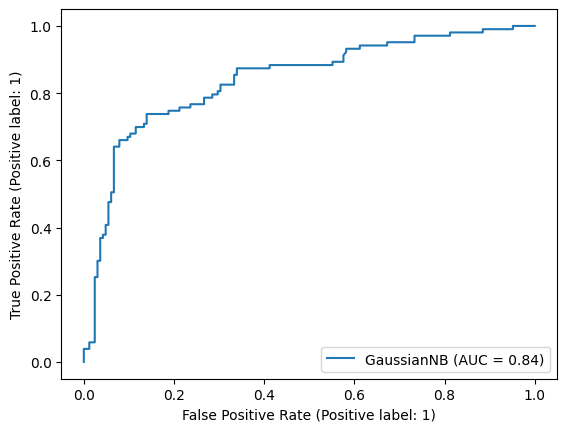

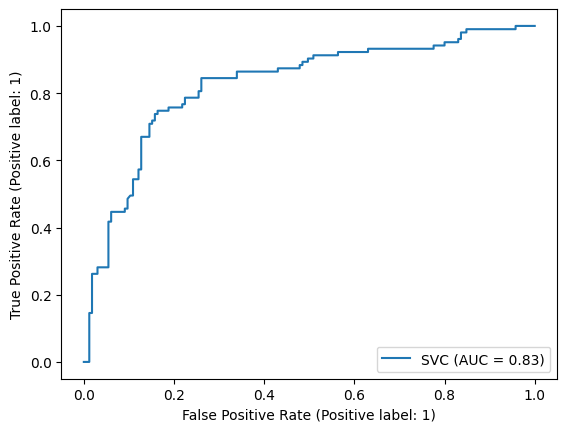

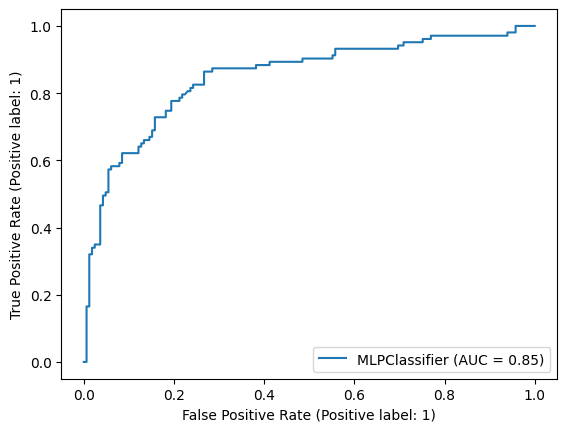

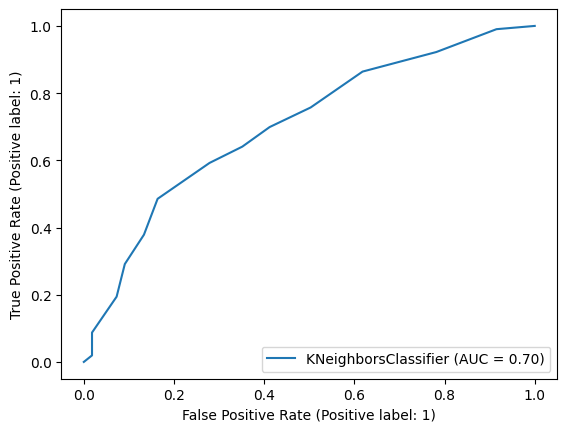

In [67]:
plot_roc_curve(grid_nb, X_test, y_test)
plot_roc_curve(grid_svc.best_estimator_, X_test, y_test)
plot_roc_curve(grid_mlp.best_estimator_, X_test, y_test)
plot_roc_curve(grid_knn.best_estimator_, X_test, y_test)

In [68]:
# GaussinNB의 경우 사전 확률을 50:50으로 설정하고,
# 나머지 모델들의 hypter parameter 튜닝 결과 기존보다 예측력이 더 나아졌음이 확인된다.
# roc_auc_score 역시 크게 향상되었다.
# GaussianNB : 0.5 -> 0.84 / SVC : 0.49 -> 0.83 / MLP : 0.70 -> 0.85 / KNN : 0.68 -> 0.70 

# 4개 모델 중 정확도를 중시 한다면 roc_auc_score가 가장 높게 나온 MLPClassifier 모델을 사용할 수 있으며,
# 속도를 원한다면 아래 모델 중 정확도는 떨어지지만 속도가 가장 빠른 KNN을 활용할 수 있다고 판단된다.
# 하지만 KNN의 roc_auc_score가 너무 낮게 나왔기에, 현재의 상황에서는 MLPClassifier가 가장 최적의 모델이라 판단된다.